# Problem Set 6
## [Ruolin Fang]

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Question 1 Multiple linear regression
### 1.a

In [3]:
mpg = pd.read_csv('data/Auto.csv', na_values = '?')

### 1.b

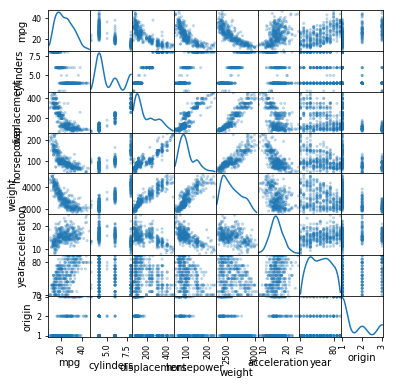

In [10]:
df_quant = mpg[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
scatter_matrix(df_quant, alpha=0.3, figsize=(6, 6), diagonal = 'kde')
plt.show()

### 1.c

In [11]:
df_quant.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


### 1.d

In [22]:
df_x = df_quant.drop(columns = ['mpg'])
X = sm.add_constant(df_x)
reg1 = sm.OLS(df_quant['mpg'], X, missing = 'drop')
results = reg1.fit()

In [23]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 17 Feb 2019   Prob (F-statistic):          2.04e-139
Time:                        22:58:23   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

(i). The coefficients of `displacement`, `weight`, `year`, and `origin` are statistically significant at the 1% level.

(ii). The coefficients of `cylinders`, `horsepower`, and `acceleration` are not statistically significant at the 10% level.

(iii). All else being equal, one unit of increase in year is correlated with 0.75 unit of increase in mpg.

### 1.e
`cylinders`, `acceleration`, and `origin` look most likely to have a nonlinear relationship with `mpg` from the picture.

(i).

In [26]:
df_x['cylinders2'] = df_x['cylinders']**2
df_x['acceleration2'] = df_x['acceleration']**2
df_x['origin2'] = df_x['origin']**2
df_x['displacement2'] = df_x['displacement']**2

In [27]:
X2 = sm.add_constant(df_x)
reg2 = sm.OLS(df_quant['mpg'], X2, missing = 'drop')
results2 = reg2.fit()

In [28]:
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     207.9
Date:                Sun, 17 Feb 2019   Prob (F-statistic):          2.99e-153
Time:                        23:00:25   Log-Likelihood:                -979.27
No. Observations:                 392   AIC:                             1983.
Df Residuals:                     380   BIC:                             2030.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2019      7.474     -0.027

(ii). Adjusted $R^2$ increases from 0.818 in part (d) to 0.853 in part (e), which is better because it means more of the variation in Y can be explained by the variables.

(iii). The coefficients on `displacement` and its squared term `displacement2` are both statistically significant at the 1% level.

(iv). The coefficients on `cylinders` and its squared term `cylinders2` are not statistically significant at the 10% level. 

### 1.f
According to the model, the predicted miles per gallon would be 38.7.

In [32]:
results2.predict([1, 6, 200, 100, 3100, 15.1, 99, 1, 6**2, 15.1**2, 1, 200**2])

array([38.67266199])

## Question 2 Classification problem: KNN
### 2.a